## Final Project Submission

Please fill out:
* Student name: **Abass Ibrahim**
* Student pace: **Full time**
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Business Aim
Our stakeholders are identified as "Potential property investors who aim to buy and sell". <br>
Our aim is to create a regression model that predicts house prices based on a number of features. <br>
For the entire process, we shall be using the **CRoss-Industry Standard Process for Data Mining (CRISP-DM)**. <br>
As such, are target variable is **price**.

## Data Understanding and Cleaning

### Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from math import sin, cos, sqrt, atan2, radians

### Import the house data csv

In [2]:
orig_data = pd.read_csv('data/kc_house_data.csv')

# Firstly, we check that all of the columns to check their data types.
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
orig_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# We should state our target variable. Price
# We can see the values for price are very large. We can divide them by 1,000,000 to get values in millions
y = orig_data['price'] / 1000000

# Of the remaining columns, all could act as features except for the id column. So this should be dropped.
feature_df = orig_data.drop(['id', 'price'], axis=1)

In [5]:
# From the column_names.md, we can see that these features would be our categorical variables
cat_X = ['date','bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']
cat_df = feature_df[cat_X]

# We can drop those from the feature_df dataframe so we can have only continuous variables
continuous_X = feature_df.drop(cat_X, axis=1)


## Data Preparation
Now we have a better idea of the data that we are dealing with, we should start cleaning it in preparation for our model.

In [6]:
# Let's have a look at the column values again in our continuous and categorical variables
continuous_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    21597 non-null  int64  
 1   sqft_lot       21597 non-null  int64  
 2   sqft_above     21597 non-null  int64  
 3   sqft_basement  21597 non-null  object 
 4   lat            21597 non-null  float64
 5   long           21597 non-null  float64
 6   sqft_living15  21597 non-null  int64  
 7   sqft_lot15     21597 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [7]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          21597 non-null  object 
 1   bedrooms      21597 non-null  int64  
 2   bathrooms     21597 non-null  float64
 3   floors        21597 non-null  float64
 4   waterfront    19221 non-null  object 
 5   view          21534 non-null  object 
 6   condition     21597 non-null  object 
 7   grade         21597 non-null  object 
 8   yr_built      21597 non-null  int64  
 9   yr_renovated  17755 non-null  float64
 10  zipcode       21597 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.8+ MB


In [8]:
# Interestingly, sqft_basement is registered as an object when it should be numerical
continuous_X['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
506.0         1
3000.0        1
1135.0        1
768.0         1
652.0         1
Name: sqft_basement, Length: 304, dtype: int64

When we run the value_counts we see that there is a "?" which has 454 counts. Evidently an NaN value.

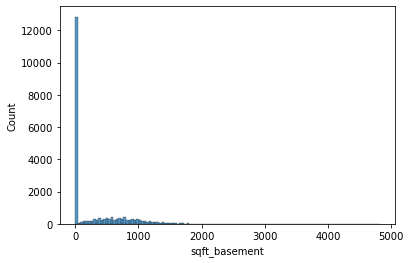

In [9]:
# We'll make a histogram to look at the distributions of the data in this column
sns.histplot(continuous_X.loc[continuous_X['sqft_basement'] != '?']['sqft_basement'].astype(float));

From the graph above we can see that 0 is clearly the modal value. And there are some extreme values towards 5000. <br>
Both the mode and median are 0. In this case, we shall use the modal of 0.
<br>
And then we shall convert that whole column into integers.

In [10]:
# We firstly replace all values of "?" with 0
continuous_X['sqft_basement'] = continuous_X['sqft_basement'].apply(lambda x: 0 if x == '?' else x)

# And then we turn the values in the column to floats
continuous_X['sqft_basement'] = continuous_X['sqft_basement'].astype(float)

In [11]:
# Whilst the data types check out, we can see there are missing values in 3 columns:

# waterfront, view & yr_renovated

# We shall calculate the percentages of values that are na within each column

print(len(cat_df[cat_df['waterfront'].isna() == True]) / len(cat_df['waterfront']))
print(len(cat_df[cat_df['view'].isna() == True]) / len(cat_df['view']))
print(len(cat_df[cat_df['yr_renovated'].isna() == True]) / len(cat_df['yr_renovated']))


0.11001527989998611
0.0029170718155299346
0.17789507802009538


In [12]:
# For each of the columns, we shall simply use their modal values to fill the na values.

# The largest proportion of na values is 17% so replacing values with the modal values should not be problematic.

cat_df['waterfront'].fillna(list(cat_df['waterfront'].mode())[0], inplace = True)
cat_df['view'].fillna(list(cat_df['view'].mode())[0], inplace = True)
cat_df['yr_renovated'].fillna(list(cat_df['yr_renovated'].mode())[0], inplace = True)

/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [13]:
# We'll also check to see if any modal 0 values in any of the columns. These may actually be NaN values
for column in cat_df.columns:
    print(column, list(cat_df[column].mode()))
    
# A house may not have a basement thus has a 0 value.

date ['6/23/2014']
bedrooms [3]
bathrooms [2.5]
floors [1.0]
waterfront ['NO']
view ['NONE']
condition ['Average']
grade ['7 Average']
yr_built [2014]
yr_renovated [0.0]
zipcode [98103]


For categorical variables, only yr_renovated has modal 0 values. <br>
However, in context this is fine. A house may not have been revovated thus has a 0 value.

In [14]:
for column in continuous_X.columns:
    print(column, list(continuous_X[column].mode()))

sqft_living [1300]
sqft_lot [5000]
sqft_above [1300]
sqft_basement [0.0]
lat [47.5322, 47.5491, 47.6624, 47.6846]
long [-122.29]
sqft_living15 [1540]
sqft_lot15 [5000]


For continuous variables, only sqft_basement has modal 0 values. <br>
However, in context this is fine. A house may not have a basement thus has a 0 value.

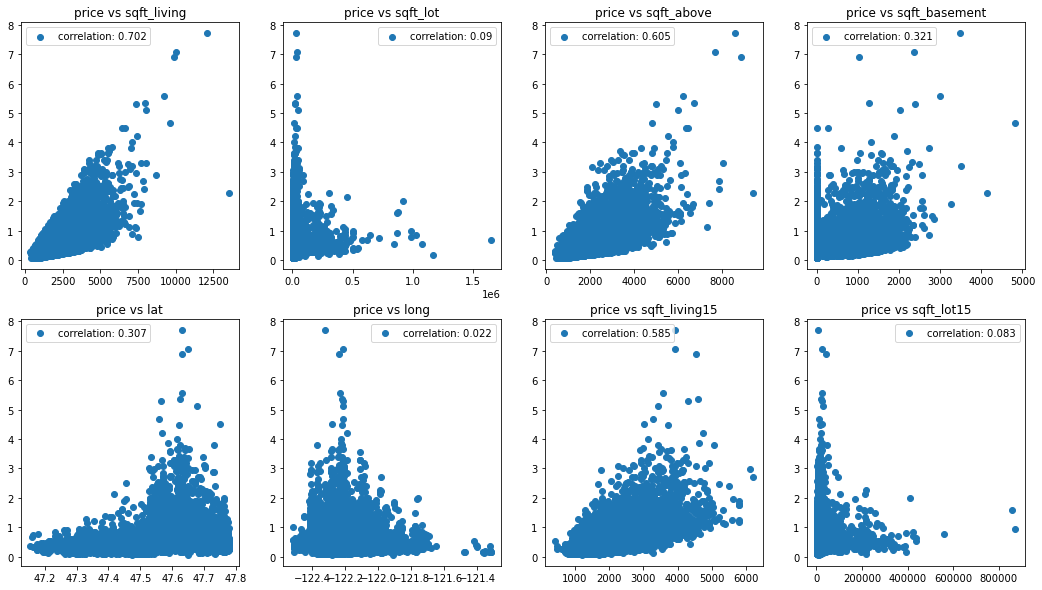

In [15]:
# Now we can plot a matrix of the continuous variables against the target variable
# The graph gives us a good idea of the distributions between each variable and the target variable.

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (18,10))
for column, ax in zip(continuous_X.columns, axes.flatten()):
    
    # We'll also check the correlations of price against each variable
    corr = round(pd.concat([continuous_X[column], y], axis=1).corr().iloc[0,1], 3)
    ax.scatter(continuous_X[column], y, label = f'correlation: {corr}')
    ax.set_title(f'price vs {column}')
    ax.legend()

Clearly sqft_living is the best correlated and longitude is the worst.
In addition, we see that lat, long and lot15 are very uncorrelated with price.

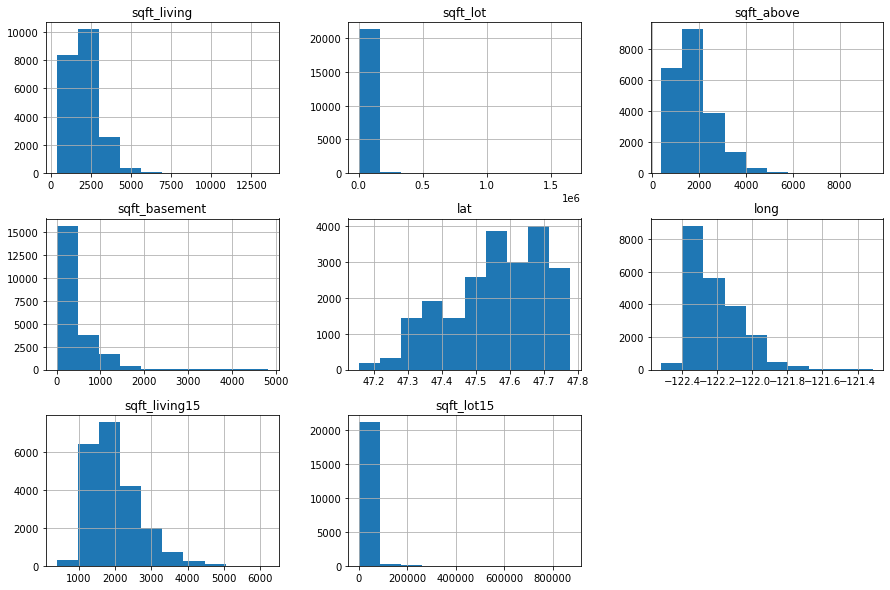

In [16]:
# We'll also take a look at the distributions of each continuous variable
continuous_X.hist(figsize=(15,10));

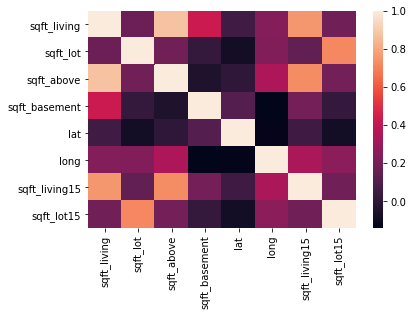

In [17]:
# We'll also create a heatmap to see which variables are highly correlated with each other.
# This is to avoid multicolinearity when making a model
sns.heatmap(continuous_X.corr());

We can filter out all variables that have a high correlation.

In [18]:
# First we'll create a dataframe based on the absolute correalation values
corr_df = continuous_X.corr().abs().stack().reset_index()

# Level_0 and level_1 refer to the variable names
# We then create a new column that is a tuple of the variable names
corr_df['pairs'] = list(zip(corr_df['level_0'], corr_df['level_1']))

# We'll make the pairs column the index
corr_df.set_index(['pairs'], inplace = True)

# We can then drop the level_0 and level_1 columns
corr_df.drop(columns = ['level_0', 'level_1'], inplace = True)

# We can then rename the '0' column to 'correlation'
corr_df.columns = ['correlation']

# From our heat map we can see that the only perfectly correlation variables are 2 of the same variables
# So we can drop rows that have a correlation of 1
corr_df = corr_df[corr_df['correlation'] != 1]

# Finally, we sort these values by correlation in descending order
corr_df.sort_values(by=['correlation'], ascending = False, inplace = True)

# We also need to get rid of duplicate values e.g. A and B is the same as B and A
corr_df.drop_duplicates(inplace = True)

# Now we can isolate those which are highly correlated
corr_df[corr_df['correlation'] >=0.75]

,correlation
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living15, sqft_living)",0.756402


We see that there are only 2 sets of highly correlated variables.


### Feature engineering

In [19]:
# Interestingly, we have both longitude and latitude so this opens room for creativity

# We'll create this function to help us calculate the distance between 2 points

def get_distance(point1, point2):
    R = 6370
    lat1 = radians(point1[0])  #insert value
    lon1 = radians(point1[1])
    lat2 = radians(point2[0])
    lon2 = radians(point2[1])

    dlon = lon2 - lon1
    dlat = lat2- lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance

# We will have to points of interest are the Centre of Seattle: (47.60457618602064, -122.32993003068658),
# and the centre of Redmond: (47.679328831807894, -122.13055895937767)
# For each record, we will calculate the distance from those points of interests and place them in a new column

continuous_X['lat_long'] = list(zip(continuous_X['lat'], continuous_X['long']))
continuous_X['Seattle_dist_km'] = continuous_X['lat_long'].apply(lambda x: get_distance(x, (47.60457618602064, -122.32993003068658)))
continuous_X['Redmond_dist_km'] = continuous_X['lat_long'].apply(lambda x: get_distance(x, (47.679328831807894, -122.13055895937767)))


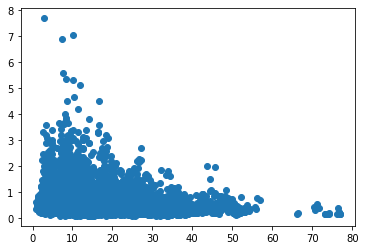

In [20]:
# Now we'll plot a graph of price against Seattle dist and Redmond dist
plt.scatter(continuous_X['Seattle_dist_km'], y);

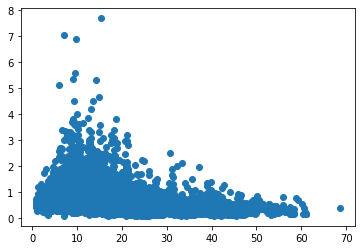

In [21]:
plt.scatter(continuous_X['Redmond_dist_km'], y);

In [110]:
# We can also include another feature: "average room size"
continuous_X['average_room_size'] = continuous_X['sqft_living'] / (cat_df['bathrooms'] + cat_df['bedrooms'])

# Another useful metric could be the Floor Area Ratio
continuous_X['floor_area_ratio'] = continuous_X['sqft_living'] / continuous_X['sqft_lot']


**We'll now draw our attention to the categorical variables**

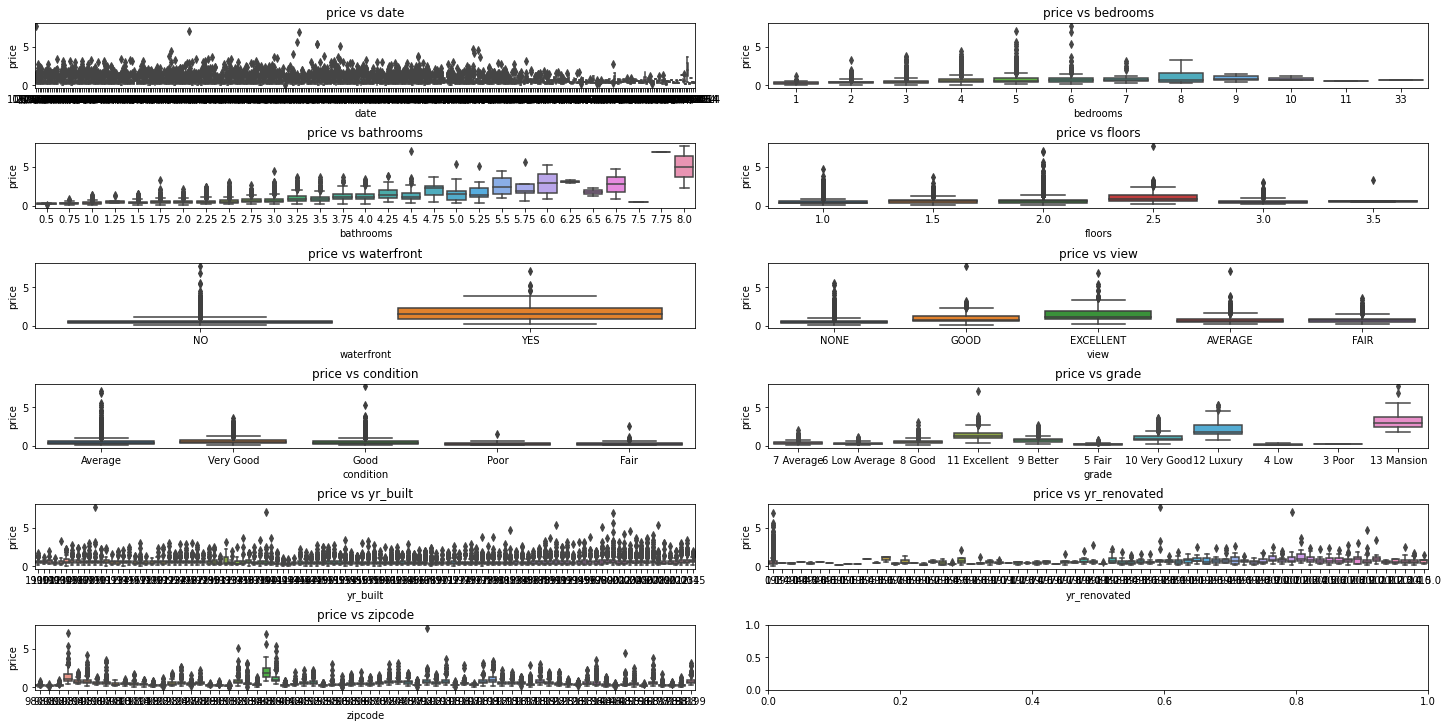

In [253]:
# For each categorical variable, we'll produce a boxplot of price against the category
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (20,10), constrained_layout=True)
for column, ax in zip(cat_df.columns, axes.flatten()):
    sns.boxplot(x=cat_df[column], y=y, ax=ax);
    ax.set_title(f'price vs {column}')

From a quick glance, there a few things to clean up. <br>
We can strip the string values from the grades to get only numerical values. <br>
For date, we can turn the values into years. From there, we can calculate **year sold - year built** <br>
There also appears to be a house with 33 bedrooms which seems very unlikely.

In [23]:
# There appears to be a house with 33 bedrooms. When we inspect it we see that this is probably due to a typo.
# Keeping its price in mind, we can assume that the entry was meant to be a "3"
cat_df.sort_values(by='bedrooms', ascending=False)

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
15856,6/25/2014,33,1.75,1.0,NO,NONE,Very Good,7 Average,1947,0.0,98103
8748,8/21/2014,11,3.00,2.0,NO,NONE,Average,7 Average,1918,1999.0,98106
13301,8/14/2014,10,5.25,1.0,NO,AVERAGE,Average,9 Better,2008,0.0,98004
19239,12/29/2014,10,3.00,2.0,NO,NONE,Good,7 Average,1913,0.0,98105
15147,10/29/2014,10,2.00,2.0,NO,NONE,Good,7 Average,1958,0.0,98006
...,...,...,...,...,...,...,...,...,...,...,...
12472,8/29/2014,1,1.00,1.0,NO,NONE,Very Good,5 Fair,1941,0.0,98103
13316,10/23/2014,1,1.00,1.0,NO,NONE,Average,6 Low Average,1918,0.0,98118
7010,9/24/2014,1,1.00,1.0,NO,NONE,Good,6 Low Average,1949,0.0,98053
3578,12/3/2014,1,0.75,1.0,NO,AVERAGE,Good,4 Low,1950,0.0,98074


In [24]:
# We'll simply correct this error and replace the value with a 3.
cat_df['bedrooms'] = cat_df['bedrooms'].apply(lambda x: 3 if x == 33 else x)

<ipython-input-24-d10bbacc0fcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['bedrooms'] = cat_df['bedrooms'].apply(lambda x: 3 if x == 33 else x)


<ipython-input-25-5842620f77de>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['grade'] = cat_df['grade'].apply(lambda x: get_digit(x))


<AxesSubplot:xlabel='grade', ylabel='price'>

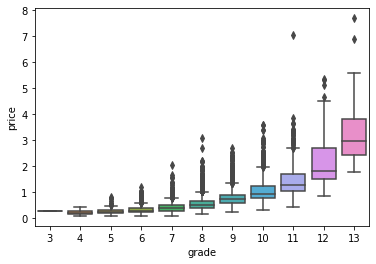

In [25]:
# We'll strip the letters from grade values using a simple function
def get_digit(string):
    for s in string.split():
        if s.isdigit():
            return int(s)

# And then apply this to the grade column.
cat_df['grade'] = cat_df['grade'].apply(lambda x: get_digit(x))

#Once we plot the graph again, we can see a clear correlation between price and grade
sns.boxplot(x=cat_df['grade'], y=y)

In [26]:
# For the date sold, we shall turn that into years
cat_df['date'] = cat_df['date'].apply(lambda x: int(x[-4:]))

# From there, we shall make a new column called year sold - year built
cat_df['yr_sold - yr_built'] = cat_df['date'] - cat_df['yr_built']

<ipython-input-26-68318454f8e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['date'] = cat_df['date'].apply(lambda x: int(x[-4:]))
<ipython-input-26-68318454f8e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['yr_sold - yr_built'] = cat_df['date'] - cat_df['yr_built']


In [ ]:
from sklearn.cluster import KMeans

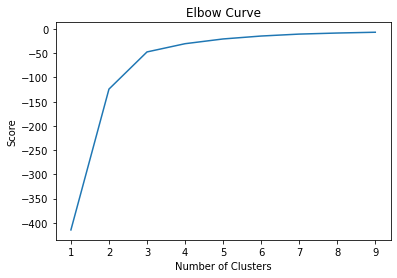

In [31]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = continuous_X[['lat']]
X_axis = continuous_X[['long']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

We can see that the rate of change of score decreases significantly after 3 clusters. The **elbow point** i.e. 3

In [102]:
# For our analysis, we'll form 3 clusters.
kmeans = KMeans(n_clusters = 3, init ='k-means++')

# Compute k-means clustering.
kmeans.fit(continuous_X[['lat', 'long']]) 

# We then create a column which assings a label of 0 to 3 to each record where each label refers to a cluster.
continuous_X['cluster_label'] = kmeans.fit_predict(continuous_X[['lat', 'long']])

# Coordinates of cluster centers.
centers = kmeans.cluster_centers_ 

# Labels of each point
labels = kmeans.predict(continuous_X[['lat', 'long']]) 

# We can now see the new column
continuous_X.head(10)

,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,lat_long,Seattle_dist_km,Redmond_dist_km,average_room_size,cluster_label
0,1180,5650,1180,0.0,47.5112,-122.257,1340,5650,"(47.5112, -122.257)",11.735081,20.958583,295.000000,2
1,2570,7242,2170,400.0,47.7210,-122.319,1690,7639,"(47.721, -122.319)",12.969553,14.841461,489.523810,1
2,770,10000,770,0.0,47.7379,-122.233,2720,8062,"(47.7379, -122.233)",16.503601,10.056675,256.666667,1
3,1960,5000,1050,910.0,47.5208,-122.393,1360,5000,"(47.5208, -122.393)",10.446943,26.414342,280.000000,1
4,1680,8080,1680,0.0,47.6168,-122.045,1800,7503,"(47.6168, -122.045)",21.399238,9.454776,336.000000,0
5,5420,101930,3890,1530.0,47.6561,-122.005,4760,101930,"(47.6561, -122.005)",25.009801,9.748899,637.647059,0
6,1715,6819,1715,0.0,47.3097,-122.327,2238,6819,"(47.3097, -122.327)",32.784329,43.663426,326.666667,2
7,1060,9711,1060,0.0,47.4095,-122.315,1650,9711,"(47.4095, -122.315)",21.717042,33.038231,235.555556,2
8,1780,7470,1050,730.0,47.5123,-122.337,1780,8113,"(47.5123, -122.337)",10.272737,24.174217,445.000000,1
9,1890,6560,1890,0.0,47.3684,-122.031,2390,7570,"(47.3684, -122.031)",34.551943,35.367130,343.636364,2


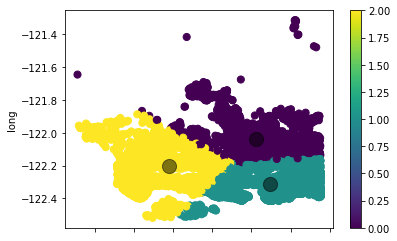

In [103]:
# We can visualise the 4 areas
continuous_X.plot.scatter(x = 'lat', y = 'long', c=labels, s=50, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


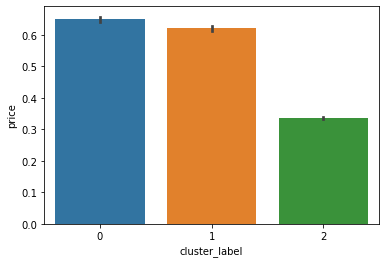

In [104]:
# We can then visualise the average price per area
sns.barplot(continuous_X['cluster_label'], y);

We'll attempt the same for **zipcodes**

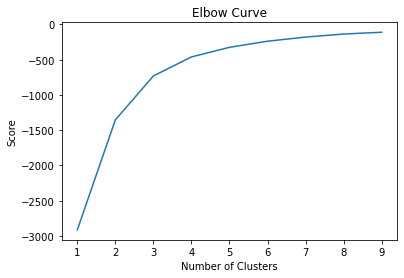

In [61]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = pd.DataFrame(y)
X_axis = cat_df['zipcode']
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

This time we get around 7 for the optimal number of clusters.

In [105]:
# For our analysis, we'll form 4 clusters.
kmeans = KMeans(n_clusters = 4, init ='k-means++')

# Compute k-means clustering.
kmeans.fit(pd.concat([y, cat_df['zipcode']], axis=1)) 

# We then create a column which assings a label of 0 to 3 to each record where each label refers to a cluster.
cat_df['zipcode_label'] = kmeans.fit_predict(pd.concat([y, cat_df['zipcode']], axis=1))

# Coordinates of cluster centers.
centers = kmeans.cluster_centers_ 

# Labels of each point
labels = kmeans.predict(pd.concat([y, cat_df['zipcode']], axis=1)) 
cat_df.head(10)

<ipython-input-105-3c726ff56cc3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['zipcode_label'] = kmeans.fit_predict(pd.concat([y, cat_df['zipcode']], axis=1))


,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,yr_sold - yr_built,zipcode_label
0,2014,3,1.00,1.0,NO,NONE,Average,7,1955,0.0,98178,59,1
1,2014,3,2.25,2.0,NO,NONE,Average,7,1951,1991.0,98125,63,3
2,2015,2,1.00,1.0,NO,NONE,Average,6,1933,0.0,98028,82,2
3,2014,4,3.00,1.0,NO,NONE,Very Good,7,1965,0.0,98136,49,3
4,2015,3,2.00,1.0,NO,NONE,Average,8,1987,0.0,98074,28,0
5,2014,4,4.50,1.0,NO,NONE,Average,11,2001,0.0,98053,13,0
6,2014,3,2.25,2.0,NO,NONE,Average,7,1995,0.0,98003,19,2
7,2015,3,1.50,1.0,NO,NONE,Average,7,1963,0.0,98198,52,1
8,2015,3,1.00,1.0,NO,NONE,Average,7,1960,0.0,98146,55,1
9,2015,3,2.50,2.0,NO,NONE,Average,7,2003,0.0,98038,12,2


/Users/Abass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


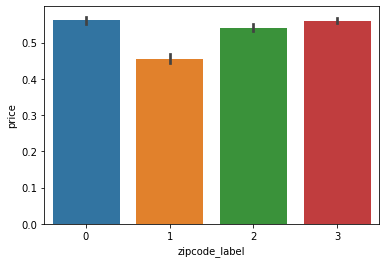

In [106]:
sns.barplot(cat_df['zipcode_label'], y);

In [43]:
# In any case, we should turn our categorical variables into dummy variables
ohe = OneHotEncoder()
cat_df_trans = ohe.fit_transform(cat_df, y)
cat_df = pd.DataFrame(cat_df_trans.todense(), columns=ohe.get_feature_names())

In [47]:
# And then we shall concat the continuous features with the categorical features
predictors = pd.concat([cat_df, continuous_X], axis=1)

# Model Building

## Holdout test

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    predictors,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1
)

## Model 1 - { Baseline Model }
This initial model will be extremely basic. It will simply take the price data and the continuous variables. <br>
We will be validating our predictions using the k fold validation method. <br> <br>
**Summary:** <br>
> *Train R squared* = **0.584** <br>
> *Test R squared* = **0.579** <br>
<br>
> *RMSE_test* = **0.579** <br>

In [117]:
from sklearn.linear_model import LinearRegression
model1_linreg = LinearRegression()

model1_scores = cross_validate(
                        model1_linreg, X_train[continuous_X.columns], y_train, cv=20, 
                        return_train_score=True
)

In [125]:
model1_mean_train = np.mean(model1_scores['train_score'])
model1_test_score = np.mean(model1_scores['test_score'])

print(f'Train R squared: {round(model1_mean_train, 3)} | Test R squared: {round(model1_test_score, 3)}')

Train R squared: 0.584 | Test R squared: 0.579


In [119]:
model1_linreg.fit(X_train[continuous_X.columns], y_train)
model1_linreg.score(X_train[continuous_X.columns], y_train)

0.5842450681184126

In [123]:
model_1_RMSE = mean_squared_error(y_train, model1_linreg.predict(X_train[continuous_X.columns]))

print(f'RMSE = ${round(model_1_RMSE, 3)} million dollars')

RMSE = $0.058 million dollars


**Analysis** <br>
An R squared value of 0.58 is a good position to start. <br>
We also see a small difference between the test and training sets which suggests no under or overfitting.

## Model 2

Now we'll include both the continuous and categorical variables.